## Simple dataset (well separated)

(2, 200) (200,)


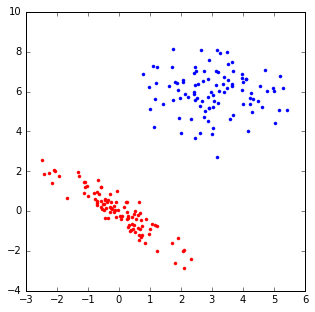

In [1]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]

c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)

x= np.r_[c1,c2].T
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])].T
print x.shape,y.shape

import matplotlib.pyplot as plt
plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')

plt.gcf().set_size_inches((5,5))

In [2]:
#Your code here

from cvxpy import *
import numpy

d = x.shape[0]
N = x.shape[1]

# Construct the problem.
a = Variable(d)
b = Variable()
error = norm(a)/2.
obj = Minimize(error)
constraints = [mul_elemwise(y.T,x.T*a+b)>=1]
prob = Problem(obj,constraints)
print prob.solve()

print a.value,b.value

0.309991783517
[[ 0.37454412]
 [ 0.49406106]] -1.52149244656


[[ 0.37454412]
 [ 0.49406106]]
-1.52149244656


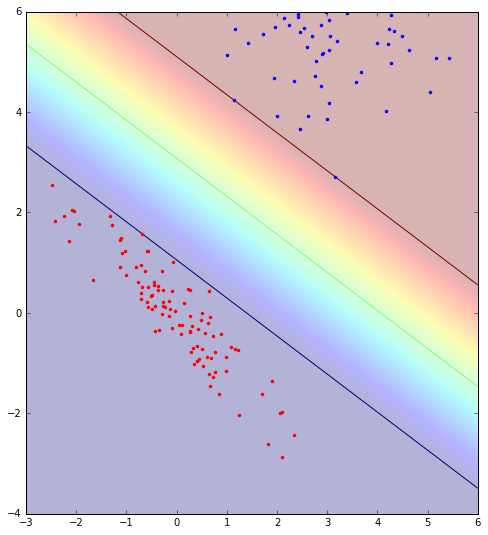

In [3]:

xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]
print a.value
print b.value

z = np.dot(viz,a.value)+b.value

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1.,0.,1.])

plt.gcf().set_size_inches((9,9))

In [253]:
from numpy import linalg as LA

In [254]:
def f(alpha):
    fx = -np.sum(alpha) + 0.5*alpha.T.dot(np.dot(Y,(np.dot(X.T, np.dot(X,Y))))).dot(alpha) 
    return fx

def grad_f(alpha):
    grad = e + np.dot(np.dot(Y,(np.dot(X.T, np.dot(X,Y)))),alpha)
    return grad

In [255]:
# data

X = x
Y = np.diag(y)
m = X.shape[1]
e = np.ones((m,1))  
k = y/LA.norm(y,2)

# Now we are ready to do the gradient descent
beta = 1.                 #  intial step size (line search)
tol=1e-08   
C = 1                     #  C gives the hyper cube
alpha= np.ones((m,1))     #  Initial alpha value 
ff = f(alpha)
g = grad_f(alpha)         #  Gradient of f
v = (np.dot(k.T, g)*k).reshape(200,1)
p = g - v                 #  Projection of the gradient
print p.shape

(200, 1)


In [256]:
               
count = 0
while ((beta > tol) and (count < 10)):
    count=count+1
    g = grad_f(alpha)
    
    finished = 0
    while ((finished == 0) and (beta > tol)):
        aux_alpha = alpha - beta*p
        aux_f = f(aux_alpha)
        
        # Check if this is a descent
        if aux_f < ff:
            alpha = aux_alpha
            ff = aux_f
            beta=1.0
            finished = 1
        else:
            beta=beta/2.0
            
print "Final values"
print "  Number of iterations", count
print "  Function value ", ff
print "  End step size", beta
# print alpha

Final values
  Number of iterations 2
  Function value  [[ 2779.42424996]]
  End step size 7.45058059692e-09


##  non-separable case

(2, 200) (200,)


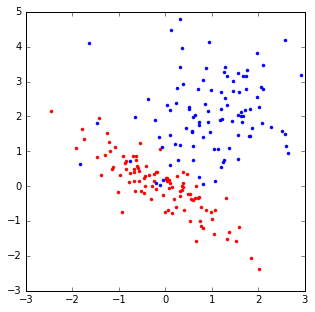

In [249]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
c2 = np.random.multivariate_normal(m2,s2,100)

x= np.r_[c1,c2].T
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])].T
print x.shape,y.shape

import matplotlib.pyplot as plt
plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gcf().set_size_inches((5,5))

In [138]:
from cvxpy import *
import numpy

d = x.shape[0]
N = x.shape[1]
c = 1.

# Construct the problem.
a = Variable(d)
b = Variable()
epsilon = Variable(N)    # pareto's optimal: chi

error = norm(a) + c*sum(epsilon)
obj = Minimize(error)
constraints = [mul_elemwise(y.T,x.T*a+b)>=1-epsilon,epsilon>=0]
prob = Problem(obj,constraints)
prob.solve()

print a.value,b.value

[[ 2.36982471]
 [ 2.36177007]] -1.93237570957


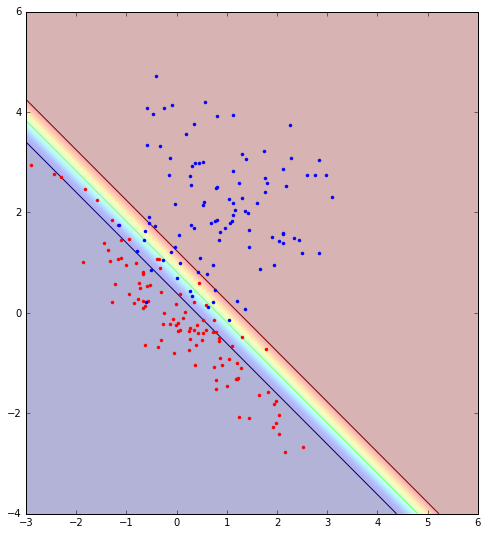

In [136]:
xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = np.dot(viz,a.value)+b.value

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.gca().set_xlim([-3.,6.])
plt.gca().set_ylim([-4.,6.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)),[-1.,0.,1.])

plt.gcf().set_size_inches((9,9))